#Table of Contents
* [1. El uso de Python como apoyo al pesaje de vehículos pesados en movimiento (WIM)](#1.-El-uso-de-Python-como-apoyo-al-pesaje-de-vehículos-pesados-en-movimiento-%28WIM%29)
* [2. Descripción del proyecto](#2.-Descripción-del-proyecto)
* [3. Adquisición de datos](#3.-Adquisición-de-datos)
	* [3.1 Uso de datos sintéticos](#3.1-Uso-de-datos-sintéticos)
* [4. Almacenamiento y flujo de lo datos](#4.-Almacenamiento-y-flujo-de-lo-datos)
* [5. Procesamiento digital de señal](#5.-Procesamiento-digital-de-señal)
	* [5.1 Corrección de baseline](#5.1-Corrección-de-baseline)
	* [5.2 Filtrado de señal](#5.2-Filtrado-de-señal)
	* [5.3 Detección de picos](#5.3-Detección-de-picos)
	* [5.4 Detección de la curva de la señal para el cálculo de peso](#5.4-Detección-de-la-curva-de-la-señal-para-el-cálculo-de-peso)

* [6. Cálculos](#6.-Cálculos)
	* [6.1 Velocidad](#6.1-Velocidad)
	* [6.2 Distancia entre ejes](#6.2-Distancia-entre-ejes)
	* [6.3 Área bajo la curva](#6.3-Área-bajo-la-curva)
	* [6.4 Pesos](#6.4-Pesos)
* [7. Clasificación de vehículos](#7.-Clasificación-de-vehículos)
* [8. Calibración de los cálculos de pesaje](#8.-Calibración-de-los-cálculos-de-pesaje)
* [9. Reconocimiento automático de matrículas vehiculares](#9.-Reconocimiento-automático-de-matrículas-vehiculares)
* [10. Conclusión](#10.-Conclusión)

<!--bibtex

@TechReport{tech:optimization-vehicle-classification,
  Title                    = {Optimization Vehicle Classification},
  Author                   = {van Boxel, DW and van Lieshout, RA},
  Institution              = {Ministerie van Verkeer en Waterstaat - Directoraat-Generaal Rijkswaterstaat - Dienst Weg- en Waterbouwkunde (DWW)},
  Year                     = {2003},

  Owner                    = {xmn},
  Timestamp                = {2014.10.22}
}

@Article{pattern-recogntion-of-strings,
  Title                    = {Pattern recognition of strings with substitutions, insertions, deletions and generalized transpositions},
  Author                   = {Oommen, B John and Loke, Richard KS},
  Journal                  = {Pattern Recognition},
  Year                     = {1997},
  Number                   = {5},
  Pages                    = {789--800},
  Volume                   = {30},

  Publisher                = {Elsevier}
}

@article{vanweigh,
  title={Weigh-in-Motion--Categorising vehicles},
  author={van Boxel, DW and van Lieshout, RA and van Doorn, RA}
}

@misc{kistler2004installation,
  title={Installation Instructions: Lineas{\textregistered} Sensors for Weigh-in-Motion Type 9195E},
  author={Kistler Instrumente, AG},
  year={2004},
  publisher={Kistler Instrumente AG, Switzerland}
}

@article{helmus2013nmrglue,
  title={Nmrglue: an open source Python package for the analysis of multidimensional NMR data},
  author={Helmus, Jonathan J and Jaroniec, Christopher P},
  journal={Journal of biomolecular NMR},
  volume={55},
  number={4},
  pages={355--367},
  year={2013},
  publisher={Springer}
}

@article{billauer2008peakdet,
  title={peakdet: Peak detection using MATLAB},
  author={Billauer, Eli},
  journal={Eli Billauer’s home page},
  year={2008}
}

@Article{article:alpr-using-python-and-opencv,
  Title                    = {Automatic License Plate Recognition using Python and OpenCV},
  Author                   = {Sajjad, K.M.},
  Year                     = {2010},

  Institution              = {Department of Computer Science and Engineering, MES College of Engineering, Kerala, India},
  Owner                    = {xmn},
  Timestamp                = {2014.08.24}
}

@inproceedings{burnos2008auto,
  title={Auto-calibration and temperature correction of WIM systems},
  author={Burnos, Piotr},
  booktitle={Fifth International Conference on Weigh-in-Motion (ICWIM5)},
  pages={439},
  year={2008}
}

@inproceedings{gajda2012analysis,
  title={Analysis of the temperature influences on the metrological properties of polymer piezoelectric load sensors applied in Weigh-in-Motion systems},
  author={Gajda, Janusz and Sroka, Ryszard and Stencel, Marek and Zeglen, Tadeusz and Piwowar, Piotr and Burnos, Piotr},
  booktitle={Instrumentation and Measurement Technology Conference (I2MTC), 2012 IEEE International},
  pages={772--775},
  year={2012},
  organization={IEEE}
}

-->

<!-- %%javascript
IPython.load_extensions('calico-document-tools'); -->

# 1. El uso de Python como apoyo al pesaje de vehículos pesados en movimiento (WIM)

Muchos accidentes en carreteras son causados directa o indirectamente por vehículos pesados conducidos con sobrepeso. Estos causan daños en el pavimento y también sufren más efectos dinámicos durante las curvas.

Para inhibir el exceso de peso de estos vehículos es necesario fiscalizar estas infracciones y, cuando necesario, aplicar las medidas establecidas por ley, como multas y aprehensiones. Un método que está siendo investigado en muchas partes del mundo es el pesaje en movimiento. Este método tiene como ventajas la economía en espacio físico y operación, ya que sus sensores son instalados en la propia carretera y no implica en atrasos en el viaje de los usuarios de la vía, pues puede pesar los vehículos pesados transitando en la velocidad directriz de la vía.

En este trabajo serán presentados tecnologías útiles para desarrollar un sistema computacional para apoyo al pesaje de vehículos en movimiento. La experiencia para desarrollar este trabajo fue obtenida a través del proyecto desarrollado en el laboratorio de transportes (**LabTrans**) de la Universidade Federal de Santa Catarina (**UFSC**). El objetivo de este trabajo es servir como base inicial para futuros investigadores del tema.

El lenguaje utilizado aquí será el Python y las librerías principales utilizadas serán: **numpy, scipy, pandas, sqlalchemy, statsmodels, numba, scikit-learn, pydaqmx, matplotlib**.

# 2. Descripción del proyecto

Un sistema computacional de pesaje de vehículos en movimiento está compuesto, básicamente, de:
- Adquisición de señal de los sensores de peso en la vía);
- Segmentación de señal (para recortar la señal respectiva al camión medido);
- Tratamiento de señales;
- Cálculos (velocidad, número de ejes, grupos de ejes, distancia entre ejes, peso total, peso por ejes, peso por grupo de ejes, largo);
- Clasificación del vehículo;
- Calibración;
- Reconocimiento de matrículas vehiculares;
- Detección de infracción;

El sistema debe ser rápido y robusto para procesar todas estas informaciones en el menor tiempo posible. Python no es un lenguaje reconocido por tener un alto desempeño, por eso, es necesario utilizar librerías y métodos para potenciar su capacidad de procesamiento.

Con base en los resultados del pesaje, clasificación y reconocimiento de la matrícula vehicular es posible saber si el vehículo cometió alguna infracción y, en caso positivo, es posible vincular la infracción a la identificación del vehículo infractor.

In [1]:
from IPython.display import display
from matplotlib import pyplot as plt
from scipy import signal
from scipy import constants
from scipy.signal import argrelextrema
from collections import defaultdict
from sklearn import metrics

import statsmodels.api as sm
import numpy as np
import pandas as pd
import numba as nb
import sqlalchemy
import psycopg2
import os
import sys
import datetime
import matplotlib as mpl

In [2]:
# local
sys.path.insert(0, os.path.dirname(os.getcwd()))

try:
    import PyDAQmx as pydaq
except NotImplementedError:
    print('Usando DAQ genérico')
    import pywim.lib.daq.generic as pydaq

# PyWIM
from pywim.lib.vehicular_classification import dww
from pywim.lib.vehicular_classification import dww_nb
from pywim.lib.daq.generic import (
    gen_synthetic_analog_data, gen_synthetic_digital_data
)


# matplotlib
mpl.style.use('ggplot')
%matplotlib inline

Usando DAQ genérico


# 3. Adquisición de datos

La adquisición de datos fue hecha a través de placas de adquisición DAQmx de la empresa National Instruments (**NI**). Para comunicar con estas fue utilizada la librería PyDAQmx, un wrap hecho en Python para los controladores del hardware fornecidos por la empresa. Esta librería es una interfaz completa para los controladores NIDAQmx ANSI C e importa todas las funciones del controlador e importa todas las constantes predefinidas. Como resultado, la librería retorna un objeto *numpy.array*.

Después de adquirir la señal de los sensores, el sistema la almacena en un buffer circular en memoria que, dentro un proceso paralelo, es analizada en busca de una señal completa de un vehículo (segmento). Este proceso fue construido de manera muy simple, donde el programa espera la señal desde un bucle inductivo y, cuando accionado, segmenta la señal con valores respectivos a los 3 segundos siguientes.

In [3]:
samples_per_channel = 1000
number_of_channels = 1

task = pydaq.Task()

task.CreateAIVoltageChan()

task.CfgSampClkTiming()
total_samples = pydaq.int32()
data_size = samples_per_channel * number_of_channels
data = np.zeros((data_size,), dtype=np.float64)

task.StartTask()

data = task.ReadAnalogF64(
    samples_per_channel,
    10.0,
    pydaq.DAQmx_Val_GroupByChannel,
    data,
    data_size,
    pydaq.byref(total_samples),
    None
)

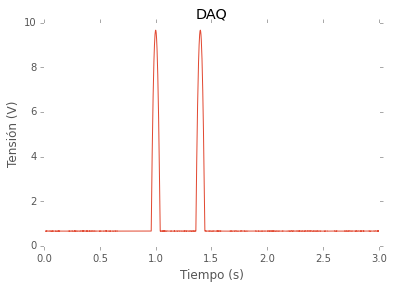

In [4]:
plt.plot(np.linspace(0, 3, 15000), data, label='sensor 1')
plt.title('DAQ')
plt.grid(True)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.show()

## 3.1 Uso de datos sintéticos

In [5]:
df = pd.DataFrame()

sample_rate = 2000
total_seconds = 3.0

# analog channel 1
df['a1'] = gen_synthetic_analog_data(
    sample_rate=sample_rate, total_seconds=total_seconds, 
    time_delay=0.7, noise_p=10
)

# analog channel 2
df['a2'] = gen_synthetic_analog_data(
    sample_rate=sample_rate, total_seconds=total_seconds, 
    time_delay=1.0, noise_p=10
)

# digital loop
df['d1'] = gen_synthetic_digital_data(
    sample_rate=sample_rate, total_seconds=total_seconds, 
    time_delay=0.8
)

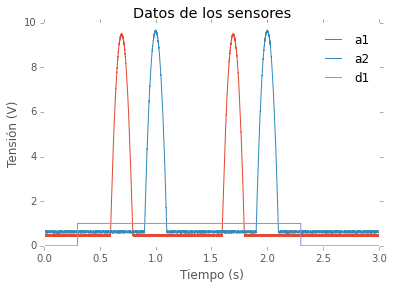

In [6]:
df.plot()
plt.title('Datos de los sensores')
plt.grid(True)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.legend()
plt.show()

# 4. Almacenamiento y flujo de lo datos

Después de segmentados, los datos brutos son almacenados en la base de datos. Eso posibilita cambiar los métodos de cálculos o parámetros de calibración, posibilitando analizar los métodos utilizados.

En todos los métodos y funciones de cálculos en el sistema, el tipo patrón para los conjuntos de datos es el *pandas.DataFrame*. Este es utilizado desde el momento de la lectura en la base de datos, en conjunto con sqlalchemy, hasta en los cálculos, ploteos y grabación en base de datos o en archivos CSV. El *pandas.DataFrame* fornece mecanismos para manipulación de datos muy parecidos a los utilizados en el lenguaje R.

In [7]:
# Connect to the database
DATABASE = {
    'host': 'localhost',
    'database': 'pywim',
    'port': '5432',
    'user': 'pywim',
    'password': 'pywim'
}

conn = psycopg2.connect(**DATABASE)

engine = sqlalchemy.create_engine(
    'postgresql+psycopg2://',
    creator=lambda: conn
)

# creates acquisition data
cur = conn.cursor()
cur.execute(
    'INSERT INTO wim.acquisition (id, date_time) ' +
    'VALUES (DEFAULT, %s) RETURNING id', (datetime.datetime.now(),)
)

acq_id = cur.fetchone()[0]

conn.commit()
cur.close()

In [8]:
# save the sensor data into database
df_data = df.copy()
df_data['acquisition'] = acq_id
df_data['time_seconds'] = df_data.index
df_data.rename(
    columns={
        'a1': 'sensor1', 'a2': 'sensor2', 'd1': 'inductive_loop'
    }, inplace=True
)

df_data.to_sql(
    'acquisition_data', con=engine, 
    schema='wim', if_exists='append', index=False
)

conn.commit()

# select acquisition data from database
df_data = pd.read_sql_query(
    '''
    SELECT * FROM wim.acquisition_data
    WHERE acquisition=%s
    ''' % acq_id, con=engine,
    index_col='time_seconds'
)

df_data.drop('acquisition', axis=1, inplace=True)

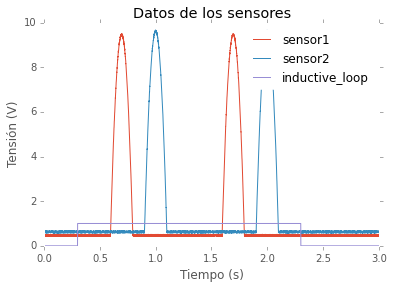

In [9]:
df_data[['sensor1', 'sensor2', 'inductive_loop']].plot()
plt.title('Datos de los sensores')
plt.grid(True)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.legend()
plt.show()

# 5. Procesamiento digital de señal

Para la realización de los cálculos, la señal necesita ser tratada y, para eso, es necesario aplicar un filtrado de señal y corrección de *baseline*. Para la aplicación del filtrado, en el ejemplo, será utilizado la recomendación de <a name="ref-1"/>[(KistlerInstrumente, 2004)](#cite-kistler2004installation), la fabricante de los sensores *Lineas*: filtrado del tipo pasa baja de orden 1, a 600 Hz.

## 5.1 Corrección de baseline

Para hacer la corrección de *baseline* pode ser utilizado el método que sea más apropiado para las características eléctricas de la señal del sensor. En la librería *nmrglue* <a name="ref-2"/>[(Helmus and Jaroniec, 2013)](#cite-helmus2013nmrglue) tiene el módulo *proc_bl* que contiene muchas funciones que pueden ayudar a hacer la corrección de *baseline*. En el ejemplo abajo, la corrección será hecha sustrayendo de la señal el valor mínimo encontrado en los primeros 100 puntos de la señal.

In [10]:
df_filt = df.copy()

for s in df_filt.keys():
    df_filt[s] -= df_filt[s][:100].min()

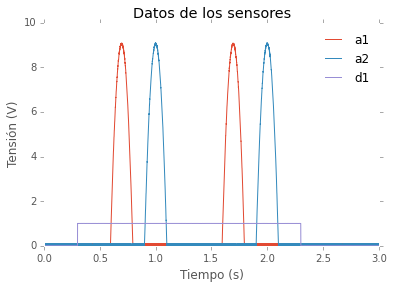

In [11]:
df_filt.plot()
plt.title('Datos de los sensores')
plt.grid(True)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.legend()
plt.show()

## 5.2 Filtrado de señal

El filtro utilizado será de tipo basa baja, de orden 1, con la frecuencia de corte de 600Hz. Para eso, fue utilizado los métodos filtfilt y butterworth de la librería scipy.

In [12]:
order = 1
freq = 600  # Mz
lower_cut = freq/sample_rate

b, a = signal.butter(order, lower_cut)

df_filt['a1'] = signal.filtfilt(b, a, df_filt['a1'])
df_filt['a2'] = signal.filtfilt(b, a, df_filt['a2'])

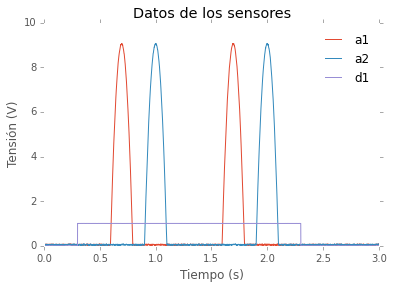

In [13]:
df_filt.plot()
plt.title('Datos de los sensores')
plt.grid(True)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.legend()
plt.show()

## 5.3 Detección de picos

El método de detección de picos a ser utilizados debe llevar en cuenta las características de la señal. En <a name="ref-3"/>[(Billauer, 2008)](#cite-billauer2008peakdet) se puede encontrar un método muy bueno para encontrar las máximas y mínimas locales. Para los datos de ejemplo, será utilizado el módulo *argrelextrema* de *scipy* y un *threshold* de 1 (volt), para evitar los ruidos de la señal.

In [14]:
peaks = {}
_tmp = df_filt['a1'].values.copy()
_tmp[_tmp < 1] = 0.0
peaks['a1'] = argrelextrema(_tmp, np.greater, order=100)[0]


_tmp = df_filt['a2'].values.copy()
_tmp[_tmp < 1] = 0.0
peaks['a2'] = argrelextrema(_tmp, np.greater, order=100)[0]

df_peaks = pd.DataFrame()
df_peaks['peak_a1'] = np.zeros(df_filt.shape[0])
df_peaks['peak_a2'] = np.zeros(df_filt.shape[0])

df_peaks['peak_a1'][peaks['a1']] = 10
df_peaks['peak_a2'][peaks['a2']] = 10

df_peaks.index = df_filt.index

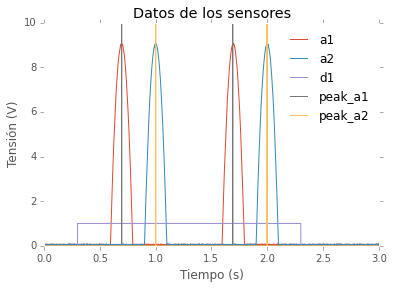

In [15]:
pd.concat((df_filt, df_peaks)).plot()
plt.title('Datos de los sensores')
plt.grid(True)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.legend()
plt.show()

## 5.4 Detección de la curva de la señal para el cálculo de peso

Para el recorte de la curva para el cálculo de peso para los sensores *Lineas* de *Kistler*, puede ser utilizado el concepto descrito en <a name="ref-4"/>[(KistlerInstrumente, 2004)](#cite-kistler2004installation). La figura abajo <a name="ref-5"/>[(KistlerInstrumente, 2004)](#cite-kistler2004installation) ilustra cómo debe ser hecho el recorte.

<figure>
  <img src="https://github.com/xmnfw/pywim/blob/master/docs/img/kistler-cut-signal-area.png?raw=true" alt="Recorte del área de la señal"/>
  <center><figcaption>Recorte del área de la señal</figcaption></center>
</figure>

Para hacerlo con los datos de ejemplo, puede ser adoptado un threshold de 0,2 y un $\Delta{t}$ de 20. Para facilitar el entendimiento, el corte será hecho desde 400 puntos antes del pico hasta 400 puntos después del pico.

In [16]:
sensor_curve = defaultdict(dict)
sensor_curve_chart = defaultdict(list)

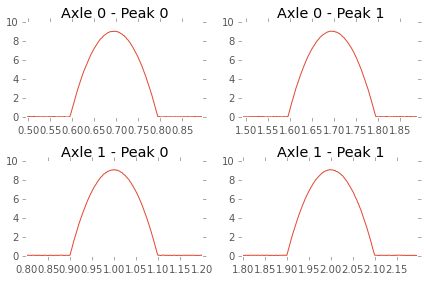

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2)

for k, s in enumerate(['a1', 'a2']):
    for i, peak in enumerate(peaks[s]):
        sensor_curve[s]['axle%s' % (i+1)] = (
            pd.Series(df_filt[s].index[peak-400:peak+400])
        )
        df_filt[s].iloc[peak-400:peak+400].plot(ax=axes[k, i])
        axes[k, i].set_title('Axle %s - Peak %s' % (k, i))
plt.tight_layout()

# 6. Cálculos

A partir de las informaciones de los picos de la señal y su curva, es posible empezar los cálculos para determinar la distancia entre ejes, velocidad y peso. A continuación, serán presentados estos cálculos utilizando los datos de ejemplo generados en las secciones anteriores.

## 6.1 Velocidad

Para calcular la velocidad es necesario, primeramente, saber la distancia entre los sensores. Para este ejemplo, será adoptada la distancia de 1 metro. La velocidad se da a través de la fórmula: $v = \frac{\Delta{s}}{\Delta{t}}$

In [18]:
distance_sensors = 1 # metro
vehicle_speed = {}

time_points = peaks['a2'][0]-peaks['a1'][0]
d_time = time_points*(1/sample_rate)
vehicle_speed['axle1'] = distance_sensors/d_time  # m/s

time_points = peaks['a2'][1]-peaks['a1'][1]
d_time = time_points*(1/sample_rate)
vehicle_speed['axle2'] = distance_sensors/d_time  # m/s

df_speed = pd.DataFrame(
    vehicle_speed, index=['speed_sensor_0_1', 'speed_sensor_1_2']
)
vehicle_speed_mean = df_speed.mean()[0]

In [19]:
display(df_speed*3.6)  # km
print('Velocidad media:', vehicle_speed_mean * 3.6, 'km/h')  # km/h

,axle1,axle2
speed_sensor_0_1,11.803279,11.707317
speed_sensor_1_2,11.803279,11.707317


Velocidad media: 11.8032786885 km/h


## 6.2 Distancia entre ejes

Para calcular la distancia entre ejes es necesario haber calculado la velocidad. La fórmula para el cálculo de la distancia entre ejes es: $\Delta{s} = v*\Delta{t}$. En este ejemplo será utilizada la velocidad media, pero también podría ser utilizada la velocidad encontrada por eje.

In [20]:
axles_distance = defaultdict(dict)

time_points = peaks['a1'][1]-peaks['a1'][0]
d_time = time_points*(1/sample_rate)
axles_distance['a1']['axle1-axle2'] = d_time*vehicle_speed_mean

time_points = peaks['a2'][1]-peaks['a2'][0]
d_time = time_points*(1/sample_rate)
axles_distance['a2']['axle1-axle2'] = d_time*vehicle_speed_mean

df_distance_axles = pd.DataFrame(axles_distance)

display(df_distance_axles)

,a1,a2
axle1-axle2,3.262295,3.270492


## 6.3 Área bajo la curva

Otra información necesaria para la realización de los cálculos de pesaje es el área bajo la curva identificada. Para realizar este cálculo es necesario hacer la integral de curva o, en este caso, la suma de los puntos de la curva.

In [21]:
df_area = pd.DataFrame()
time_interval = 1/sample_rate

print('intervalo de tiempo:', time_interval)

for s in sensor_curve:
    area = {}
    for axle, v in sensor_curve[s].items():
        # sumatorio con corrección de baseline
        area.update({axle: (v-v.min()).sum()*time_interval})
    df_area[s] = pd.Series(area)

df_area = df_area.T

display(df_area)

intervalo de tiempo: 0.0005


,axle1,axle2
a1,0.079913,0.079913
a2,0.079913,0.079913


## 6.4 Pesos

Para calcular el peso del vehículo serán utilizadas las informaciones de velocidad, la curva de cada eje, . Para los sensores *Lineas* de *Kistler*, debe ser seguida la siguiente formula <a name="ref-6"/>[(KistlerInstrumente, 2004)](#cite-kistler2004installation):
$W = ( V / L_s ) * A * C$, donde *W* es la variable de peso, *V* es la velocidad, *$L_s$* es el ancho del sensor, *A* es la integral de la curva y *C* es una constante de calibración. Para otros tipos de sensores, la fórmula es similar. Para sensores del tipo piezoeléctrico polímero y cerámicos es necesario considerar un método para corrección de los resultados debido a la sensibilidad a la temperatura <a name="ref-7"/>[(Burnos, 2008)](#cite-burnos2008auto), <a name="ref-8"/>[(Gajda et al., 2012)](#cite-gajda2012analysis). Para los datos de ejemplo, serán calculados los pesos sobre los ejes y el peso bruto total utilizando como parámetro: el ancho del sensor con el valor de 0.53 metros y la constante de calibración igual a 1 para todos los sensores.

In [22]:
amp_sensibility = 0.15*10**-3  # 1.8 pC/N*5V/60000pC

C = pd.Series([1, 1])
Ls = pd.Series([0.53] * 2)

V = df_speed.reset_index(drop=True)
A = df_area.reset_index(drop=True)
W = pd.DataFrame()

for axle in V.keys():
    W[axle] = ((V[axle]/Ls)*A[axle]*C)/amp_sensibility/constants.g

In [23]:
display(W)
print('\nPromedio por eje:')
display(W.mean())
print('\nPeso Bruto Total:', W.mean().sum(), 'kg')

,axle1,axle2
0,336.071376,333.339088
1,336.071376,333.339088



Promedio por eje:


axle1    336.071376
axle2    333.339088
dtype: float64


Peso Bruto Total: 669.410464438 kg


# 7. Clasificación de vehículos

Aquí será presentado un método para clasificación vehicular basado en los trabajos de <a name="ref-9"/>[(vanBoxel and vanLieshout, 2003)](#cite-tech:optimization-vehicle-classification) y <a name="ref-10"/>[(Oommen and Loke, 1997)](#cite-pattern-recogntion-of-strings)

En este método, es utilizado un conjunto de *layouts* de referencias, definido por un conjunto de símbolos, que representa el diseño del vehículo, como puede ser visto en la figura abajo <a name="ref-11"/>[(vanBoxel and vanLieshout, 2003)](#cite-tech:optimization-vehicle-classification).

<figure>
  <img src="https://github.com/xmnfw/pywim/blob/master/docs/img/dww-layout.png?raw=true" alt="Ejemplos de layout de vehículos"/>
  <center><figcaption>Ejemplo de *layouts* de la representación de clases de vehículos pesados</figcaption></center>
</figure>

Para clasificar el vehículo, el sistema crea un *layout* para el vehículo medido, lo compara con *layouts* de referencias y clasifica el vehículo que con el *layout* de referencia que resulta más próximo.

Este método presenta bajo desempeño en el lenguaje Python. Para solucionar esto, fue utilizada la librería numba, llegando a ser cerca de 100 veces más rápido. Fue necesária una adaptación en el algoritmo donde, ante de hacer las comparaciones, el *layout* del veículo y el *layout* de la clase de referencia son convertidos en números, así la función de comparación puede ser marcada para ser compilada en modo **nopython**. Cuanto más cerca de 0 más cerca el layout del vehículo está del *layout* de referencia.

In [24]:
layout = dww.layout_to_int(dww.layout((7, 2, 0.5, 2)))
layout_ref = dww.layout_to_int('-O----O-O----O-')

z = np.zeros((len(layout), len(layout_ref)), dtype=int)

%time resultado = dww_nb.D(layout, layout_ref, z)
%time dww.D(layout, layout_ref, z)

print(resultado)

CPU times: user 422 ms, sys: 0 ns, total: 422 ms
Wall time: 420 ms
CPU times: user 1.33 ms, sys: 0 ns, total: 1.33 ms
Wall time: 1.56 ms
0


# 8. Calibración de los cálculos de pesaje

La calibración periódica en sistemas de pesaje es muy importante para mantener a un bajo margen de errores los pesos calculados. Para apoyar esta etapa puede ser utilizado el método de regresión lineal por mínimos cuadrados (*OLS*) de la librería *statsmodels* que, por ejemplo, posibilita saber informaciones como el coeficiente de determinación (R²) de la regresión lineal realizada. La librería *scikit-learn* también puede ser usada en esta etapa con finalidad de apoyo en los análisis de los resultados. Para probar estas funcionalidades, serán utilizados dados de pesaje sintéticos con ruidos, para simular los errores de medición con 100 pasadas de dos camiones con peso conocido.

In [25]:
# datos sintéticos
df_weight = pd.DataFrame({
    'a1': np.ones(200), 'a2': np.ones(200), 'target': np.ones(200)
})

df_weight.loc[:100, ['a1', 'a2']] = 8000
df_weight.loc[100:, ['a1', 'a2']] = 10000

df_weight['a1'] += np.random.random(200)*1000
df_weight['a2'] += np.random.random(200)*1000

df_weight.loc[:100, ['target']] = 8000
df_weight.loc[100:, ['target']] = 10000

In [26]:
r2 = {}
c = {}
predict = []
X = []

for i, s in enumerate(['a1', 'a2']):
    # Adds a constant term to the predictor
    X.append(sm.add_constant(df_weight[s]))
             
    model = sm.OLS(df_weight['target'], X[i])
    predict.append(model.fit())
    r2[s] = [predict[i]._results.rsquared]
    c[s] = predict[i].params[s]
print('R2', r2)
print('CC', c)

R2 {'a1': [0.92637881564525093], 'a2': [0.92627050954849433]}
CC {'a1': 0.91934559137828353, 'a2': 0.92638306555607997}


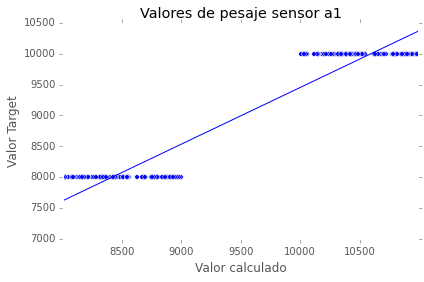

In [27]:
i, s = 0, 'a1'
fig = sm.graphics.abline_plot(model_results=predict[i])
ax = fig.axes[0]
ax.scatter(df_weight[s], df_weight['target'])
ax.set_xlabel('Valor calculado')
ax.set_ylabel('Valor Target')
ax.set_title('Valores de pesaje sensor %s' % s)
plt.tight_layout()

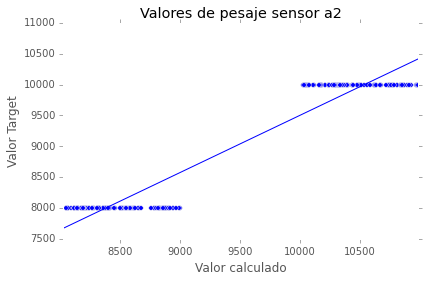

In [28]:
i, s = 1, 'a2'
fig = sm.graphics.abline_plot(model_results=predict[i])
ax = fig.axes[0]
ax.scatter(df_weight[s], df_weight['target'])
ax.set_xlabel('Valor calculado')
ax.set_ylabel('Valor Target')
ax.set_title('Valores de pesaje sensor %s' % s)
plt.tight_layout()

In [29]:
def score_95_calc(metric_score, y, y_pred):
    if y.shape[0] < 1:
        print('size calc 0')
        return 0.0

    y_true = np.array([True] * y.shape[0])
    lb, ub = y - y * 0.05, y + y * 0.05

    y_pred_95 = (lb < y_pred) == (y_pred < ub)
    y_pred_95 = y_pred_95 == True

    return metric_score(y_true, y_pred_95)


def score_95_base(metric_score, estimator, X_test, y_test):
    if y_test.shape[0] < 1:
        print('size base 0')
        return 0.0
    y_pred = estimator.predict(X_test)
    return score_95_calc(metric_score, y_test, y_pred)

In [30]:
def score_95_accuracy(estimator, X, y):
    return score_95_base(metrics.accuracy_score, estimator, X, y)


def score_95_precision(estimator, X, y):
    return score_95_base(metrics.precision_score, estimator, X, y)


def score_95_recall(estimator, X, y):
    return score_95_base(metrics.recall_score, estimator, X, y)


def score_95_f1_score(estimator, X, y):
    return score_95_base(metrics.f1_score, estimator, X, y)

In [31]:
df_weight_cc = df_weight[['a1', 'a2']].copy()

for s in ['a1', 'a2']:
    df_weight_cc[s] *= c[s]
    
df_gross_weight = df_weight_cc.mean(axis=1)

for _m_name, _metric in [
    ('accuracy', metrics.accuracy_score),
    ('precision', metrics.precision_score),
    ('recall', metrics.recall_score),
    ('f1 score', metrics.f1_score),
]:
    print(
        ('%s:' % _m_name).ljust(22, ' '),
        score_95_calc(_metric, df_weight['target'], df_gross_weight)
    )


accuracy:              0.84
precision:             1.0
recall:                0.84
f1 score:              0.913043478261


# 9. Reconocimiento automático de matrículas vehiculares

El reconocimiento de matrículas vehiculares puede ser realizado a través de una cámara ALPR. También es posible hacer este procesamiento separado, sin utilizar la cámara ALPR. Un material muy interesantes sobre el tema es el trabajo <a name="ref-12"/>[(Sajjad, 2010)](#cite-article:alpr-using-python-and-opencv) que provee informaciones y ejemplos de cómo hacer el reconocimiento de matrículas vehiculares utilizando el lenguaje Python junto con la librería *OpenCV*. La matrícula vehicular es muy importante para los sistemas de pesaje de vehículos pesados pues con esta información es posible penalizar los infractores, principalmente los que huyen después de recibir el aviso de detención en las estaciones de control de pesaje.

# 10. Conclusión

Este es un trabajo inicial con propósito educativo de cómo crear un sistema computacional de apoyo al pesaje de vehículos pesados en movimiento. Los próximos pasos para evolucionar este trabajo es ampliar los temas de: 
- Adquisición de datos, desde la configuración eléctrica, hasta los parámetros de configuración de la misma;
- Reconocimiento automático de matrículas vehiculares, utilizando alguna librería y desarrollando algunos ejemplos;
- Diferencias entre algoritmos para cálculo de pesaje entre sensores del tipo piezoelétrictos cuarzo, cerámico y polímero.

#References

<a name="cite-kistler2004installation"/><sup>[^](#ref-1) [^](#ref-4) [^](#ref-5) [^](#ref-6) </sup>Kistler Instrumente, AG. 2004. _Installation Instructions: Lineas\textregistered Sensors for Weigh-in-Motion Type 9195E_.

<a name="cite-helmus2013nmrglue"/><sup>[^](#ref-2) </sup>Helmus, Jonathan J and Jaroniec, Christopher P. 2013. _Nmrglue: an open source Python package for the analysis of multidimensional NMR data_.

<a name="cite-billauer2008peakdet"/><sup>[^](#ref-3) </sup>Billauer, Eli. 2008. _peakdet: Peak detection using MATLAB_.

<a name="cite-burnos2008auto"/><sup>[^](#ref-7) </sup>Burnos, Piotr. 2008. _Auto-calibration and temperature correction of WIM systems_.

<a name="cite-gajda2012analysis"/><sup>[^](#ref-8) </sup>Gajda, Janusz and Sroka, Ryszard and Stencel, Marek and Zeglen, Tadeusz and Piwowar, Piotr and Burnos, Piotr. 2012. _Analysis of the temperature influences on the metrological properties of polymer piezoelectric load sensors applied in Weigh-in-Motion systems_.

<a name="cite-tech:optimization-vehicle-classification"/><sup>[^](#ref-9) [^](#ref-11) </sup>van Boxel, DW and van Lieshout, RA. 2003. _Optimization Vehicle Classification_.

<a name="cite-pattern-recogntion-of-strings"/><sup>[^](#ref-10) </sup>Oommen, B John and Loke, Richard KS. 1997. _Pattern recognition of strings with substitutions, insertions, deletions and generalized transpositions_.

<a name="cite-article:alpr-using-python-and-opencv"/><sup>[^](#ref-12) </sup>Sajjad, K.M.. 2010. _Automatic License Plate Recognition using Python and OpenCV_.